# House Price Prediction Kaggle Project
### Machine Learning Project (NYCDSA)
- **Team:** Pump Up the Bayes (Alex Sigman & Youngmin Paul Cho)


# 0. Initialize

[Feature Engineering: 7 types of data](https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689)

In [132]:
# Initializing

# data processing. pandas as alias pd
import pandas as pd 
# linear algebra. numpy as alias np
import numpy as np 

# If you're working with a notebook, don't forget to use Matplotlib magic! 
%matplotlib inline

# matlab-style plotting
import matplotlib.pyplot as plt 
## ggplot
plt.style.use('ggplot')
import seaborn as sns
color = sns.color_palette()
# Set the Seaborn theme if desired
sns.set_style("darkgrid")

# ignore sklearn & seaborn warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

#for some statistics
from scipy import stats
from scipy.stats import norm, skew  #ex. sns(fit = norm)


# Format scientific notation from pandas aggregation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [133]:
# import csv to train and test datasets in pandas dataframe
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv("./data/test.csv") 

In [134]:
import os
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=250):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# ignore future warning
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Simple EDA on Train Dataset

## 1.1. Understand the Data

In [135]:
train_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1339,1340,20,RL,120.000,9560,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,7,1972,1972,Hip,CompShg,MetalSd,MetalSd,None,0.000,TA,Gd,CBlock,TA,TA,Mn,Rec,360,Unf,0,504,864,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1972.000,RFn,1,288,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,128500
701,702,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,1969,1969,Hip,CompShg,HdBoard,HdBoard,BrkFace,168.000,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1164,1164,GasA,TA,Y,SBrkr,1164,0,0,1164,0,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1969.000,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,COD,Normal,140000
644,645,20,FV,85.000,9187,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,9,5,2009,2009,Gable,CompShg,CemntBd,CmentBd,Stone,162.000,Ex,TA,PConc,Ex,TA,Mn,GLQ,1121,Unf,0,645,1766,GasA,Ex,Y,SBrkr,1766,0,0,1766,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2009.000,Fin,3,478,TA,TA,Y,195,130,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,Partial,370878
1214,1215,85,RL,69.000,10205,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SFoyer,5,5,1962,1962,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,TA,TA,Av,BLQ,784,Unf,0,141,925,GasA,TA,Y,SBrkr,999,0,0,999,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1962.000,Unf,1,300,TA,TA,Y,150,72,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,134500
1009,1010,50,RL,60.000,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,5,1926,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Ex,Y,SBrkr,1008,0,514,1522,0,0,2,0,4,1,TA,7,Typ,0,NaN,NaN,nan,NaN,0,0,NaN,NaN,P,0,0,138,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102000


In [136]:
# train_df.describe()
# train_df.dtypes
# train_df.info()
# train_df.Alley 

***Dropping ID column***

In [137]:
# Dropping ID COLUMN --------------------------------------------------------------------------------------------------

#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train_df.shape))
print("The test data size before dropping Id feature is : {} ".format(test_df.shape))

#Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
print("\n ----------ID column dropped both for train & test----------")
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train_df.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test_df.shape)) 

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

 ----------ID column dropped both for train & test----------

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## 1.2 Removing Outliers: using Simple Linear Regression

In [138]:
temp = train_df.copy()
temp['HouseSF'] = temp['TotalBsmtSF'] + temp['GrLivArea'] + temp['GarageArea'] 

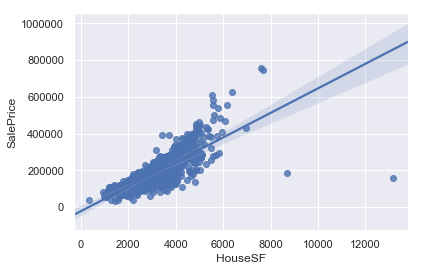

In [139]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=temp['HouseSF'], y=temp['SalePrice'])

In [140]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
## fit your linear model with fit() function
ols.fit(temp[['HouseSF']], temp['SalePrice'])
rss = (temp['SalePrice']-ols.predict(temp[['HouseSF']]))

In [141]:
rss.sort_values(ascending=False).head(10).index # [691, 898, 1182, 803, 1169, 1046, 688, 769, 1181, 440]
temp.index[temp['HouseSF']>8000].tolist() # [523, 1298]
train_df = train_df.drop(train_df.index[[523, 1298, 691, 898, 1182, 803, 1169, 1046, 688, 769, 1181, 440]])

**Output Result**

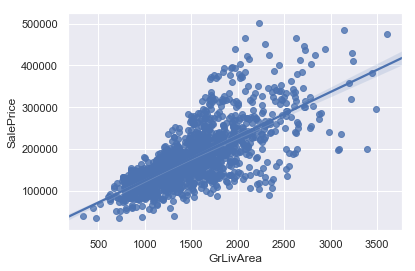

In [142]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])

## 1.2 Combining Train and Test

In [143]:


# get row numbers for both
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
# store SalePrice
y_train = train_df.SalePrice.values
# concat train & test
all_data = pd.concat((train_df,test_df)).reset_index(drop=True) #make sure to reset index, because they will be overlapped
# drop target value on Features
all_data.drop(['SalePrice'], axis=1, inplace=True)  # axis=1 & inplace=True; to make it have impact

print("Size of all_data : {} rows and {} columns".format(all_data.shape[0], all_data.shape[1])) 

Size of all_data : 2907 rows and 79 columns


### Missing Values

In [144]:
#missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)  

,Total,Percent
PoolQC,2899,0.997
MiscFeature,2802,0.964
Alley,2709,0.932
Fence,2337,0.804
FireplaceQu,1420,0.488
LotFrontage,486,0.167
GarageFinish,159,0.055
GarageQual,159,0.055
GarageYrBlt,159,0.055
GarageCond,159,0.055


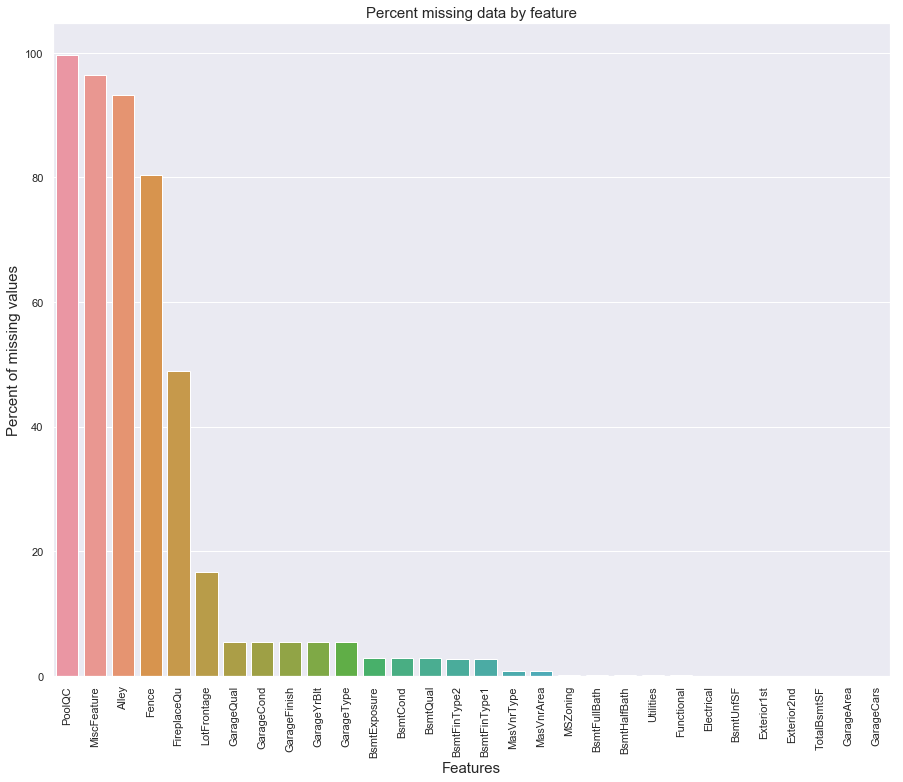

In [145]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

In [147]:
all_data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

## Imputation and Dropping Columns

**PoolQC :** data description says NA means "No Pool" and majority of houses have no Pool at all in general. (99%)

In [128]:
all_data = all_data.drop("PoolQC", axis=1)   # 0.997

**MiscFeature :** data description says NA means "no misc feature" 0.964% Missing but may be significant?

In [130]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
# all_data = all_data.drop("MiscFeature", axis=1)

**Alley**: Doesn't seem significant  + 0.932% missing

In [148]:
# all_data["Alley"] = all_data["Alley"].fillna("None")
all_data = all_data.drop("Alley", axis=1)  

**Fence** : data description says NA means "no fence"

In [150]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [ ]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)    
    
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.     
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')    

In [ ]:
# IMPUTATION BY MEDIUM

# continuous
all_data["BsmtFinSF1"].fillna(all_data["BsmtFinSF1"].median(), inplace=True) 
# continuous
all_data["BsmtFinSF2"].fillna(all_data["BsmtFinSF2"].median(), inplace=True) 
# continuous
all_data["GarageArea"].fillna(all_data["GarageArea"].median(), inplace=True) 
# continuous
all_data["TotalBsmtSF"].fillna(all_data["TotalBsmtSF"].median(), inplace=True) 

# IMPUTATION BY 0
# Both of these features have identical missing values. Also missing values on other Bsmt. Safely fill them with 0s
for col in ["BsmtFullBath",'BsmtHalfBath']:
    all_data[col].fillna(0, inplace = True)

# IMPUTATION BY MODE
all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0], inplace = True)
# Nominal
all_data["Neighborhood"].fillna(all_data["Neighborhood"].mode()[0], inplace=True) 
# Nominal
all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0], inplace=True) 
# Nominal
all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0], inplace = True)
# Nominal
all_data["Functional"].fillna(all_data["Functional"].mode()[0], inplace=True) 


## Correlation

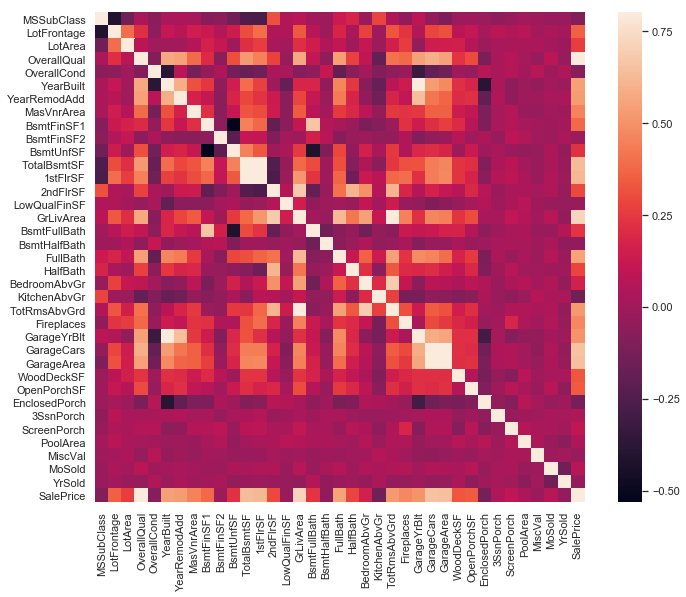

In [112]:
#Correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

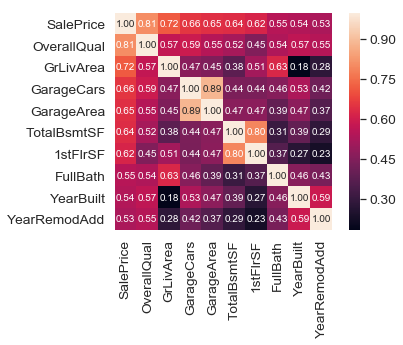

In [113]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show() 

### 1.3 Finding Data Type of Each Features

In [61]:
import re
with open('./data/DataDocumentation.txt', 'r',encoding='cp1252') as file:
    lines = file.readlines()
    
nominal = []
ordinal = []
continuous = []
discrete = []
for line in lines:
    if re.findall('(Nominal)', line):
        nominal.append(re.sub(' ', '', re.split('\(Nominal\)', line)[0].strip()))
    elif re.findall('(Ordinal)', line):
        ordinal.append(re.sub(' ', '', re.split('\(Ordinal\)', line)[0].strip()))
    elif re.findall('(Continuous)', line):
        continuous.append(re.sub(' ', '', re.split('\(Continuous\)', line)[0].strip()))
    elif re.findall('(Discrete)', line):
        discrete.append(re.sub(' ', '', re.split('\(Discrete\)', line)[0].strip()))
nominal = np.array(nominal)
nominal = np.delete(nominal, [0]) # Drop ID
nominal[13] = 'Exterior1st'       # Update Exterior1 to Exterior1st
nominal[14] = 'Exterior2nd'
ordinal = np.array(ordinal)
continuous = np.array(continuous)
continuous[15] = '3SsnPorch'
discrete = np.array(discrete)
discrete[2] = 'YearRemodAdd'
discrete[7] = 'BedroomAbvGr'
discrete[8] = 'KitchenAbvGr'
discrete = np.delete(discrete, [0]) # Drop Order

##### Nominal Categorical Variables

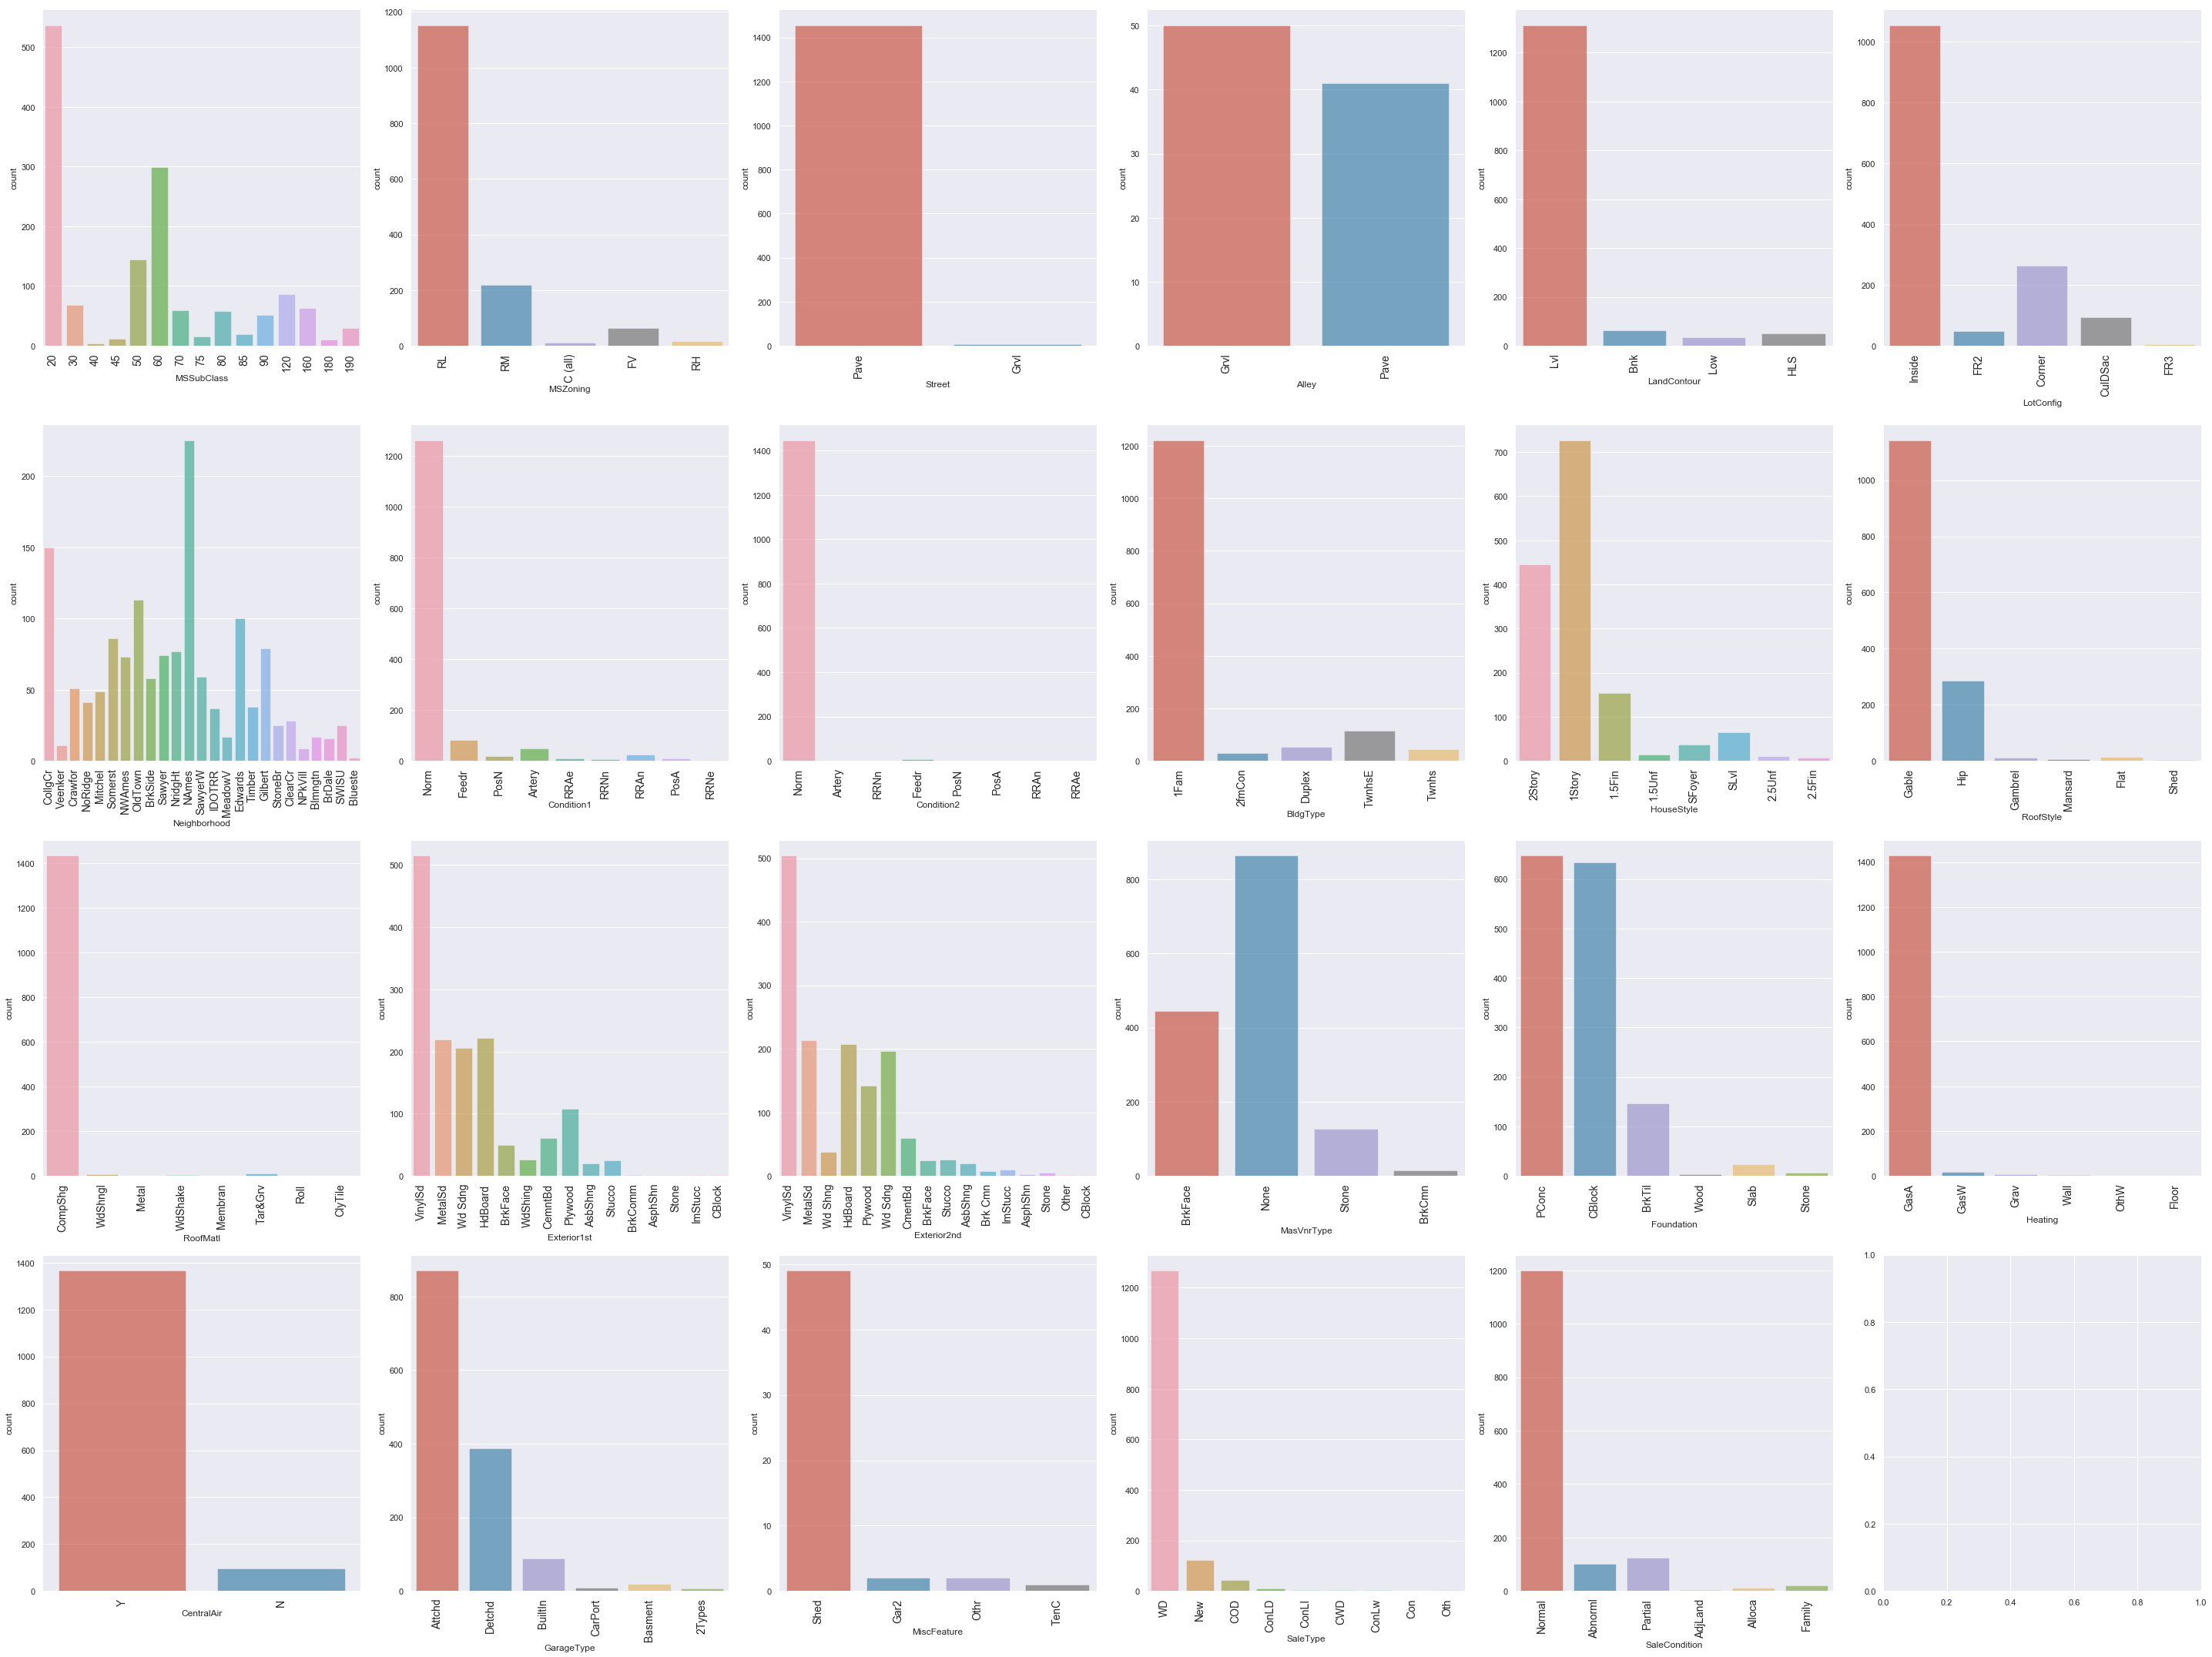

In [62]:
fig, axes = plt.subplots(round(len(train_df[nominal].columns) / 6), 6, figsize=(40, 30))
for i, ax in enumerate(fig.axes):
    if i < len(train_df[nominal].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=14)
        sns.countplot(x=train_df[nominal].columns[i], alpha=0.7, data=train_df[nominal], ax=ax)

fig.tight_layout()
fig.savefig('./images/nominal_cnt.png', bbox_inches='tight')  

# save_fig("nominal_countplot") <- use this function if you want higher resolution
plt.show()

##### Ordinal Categorical Variables

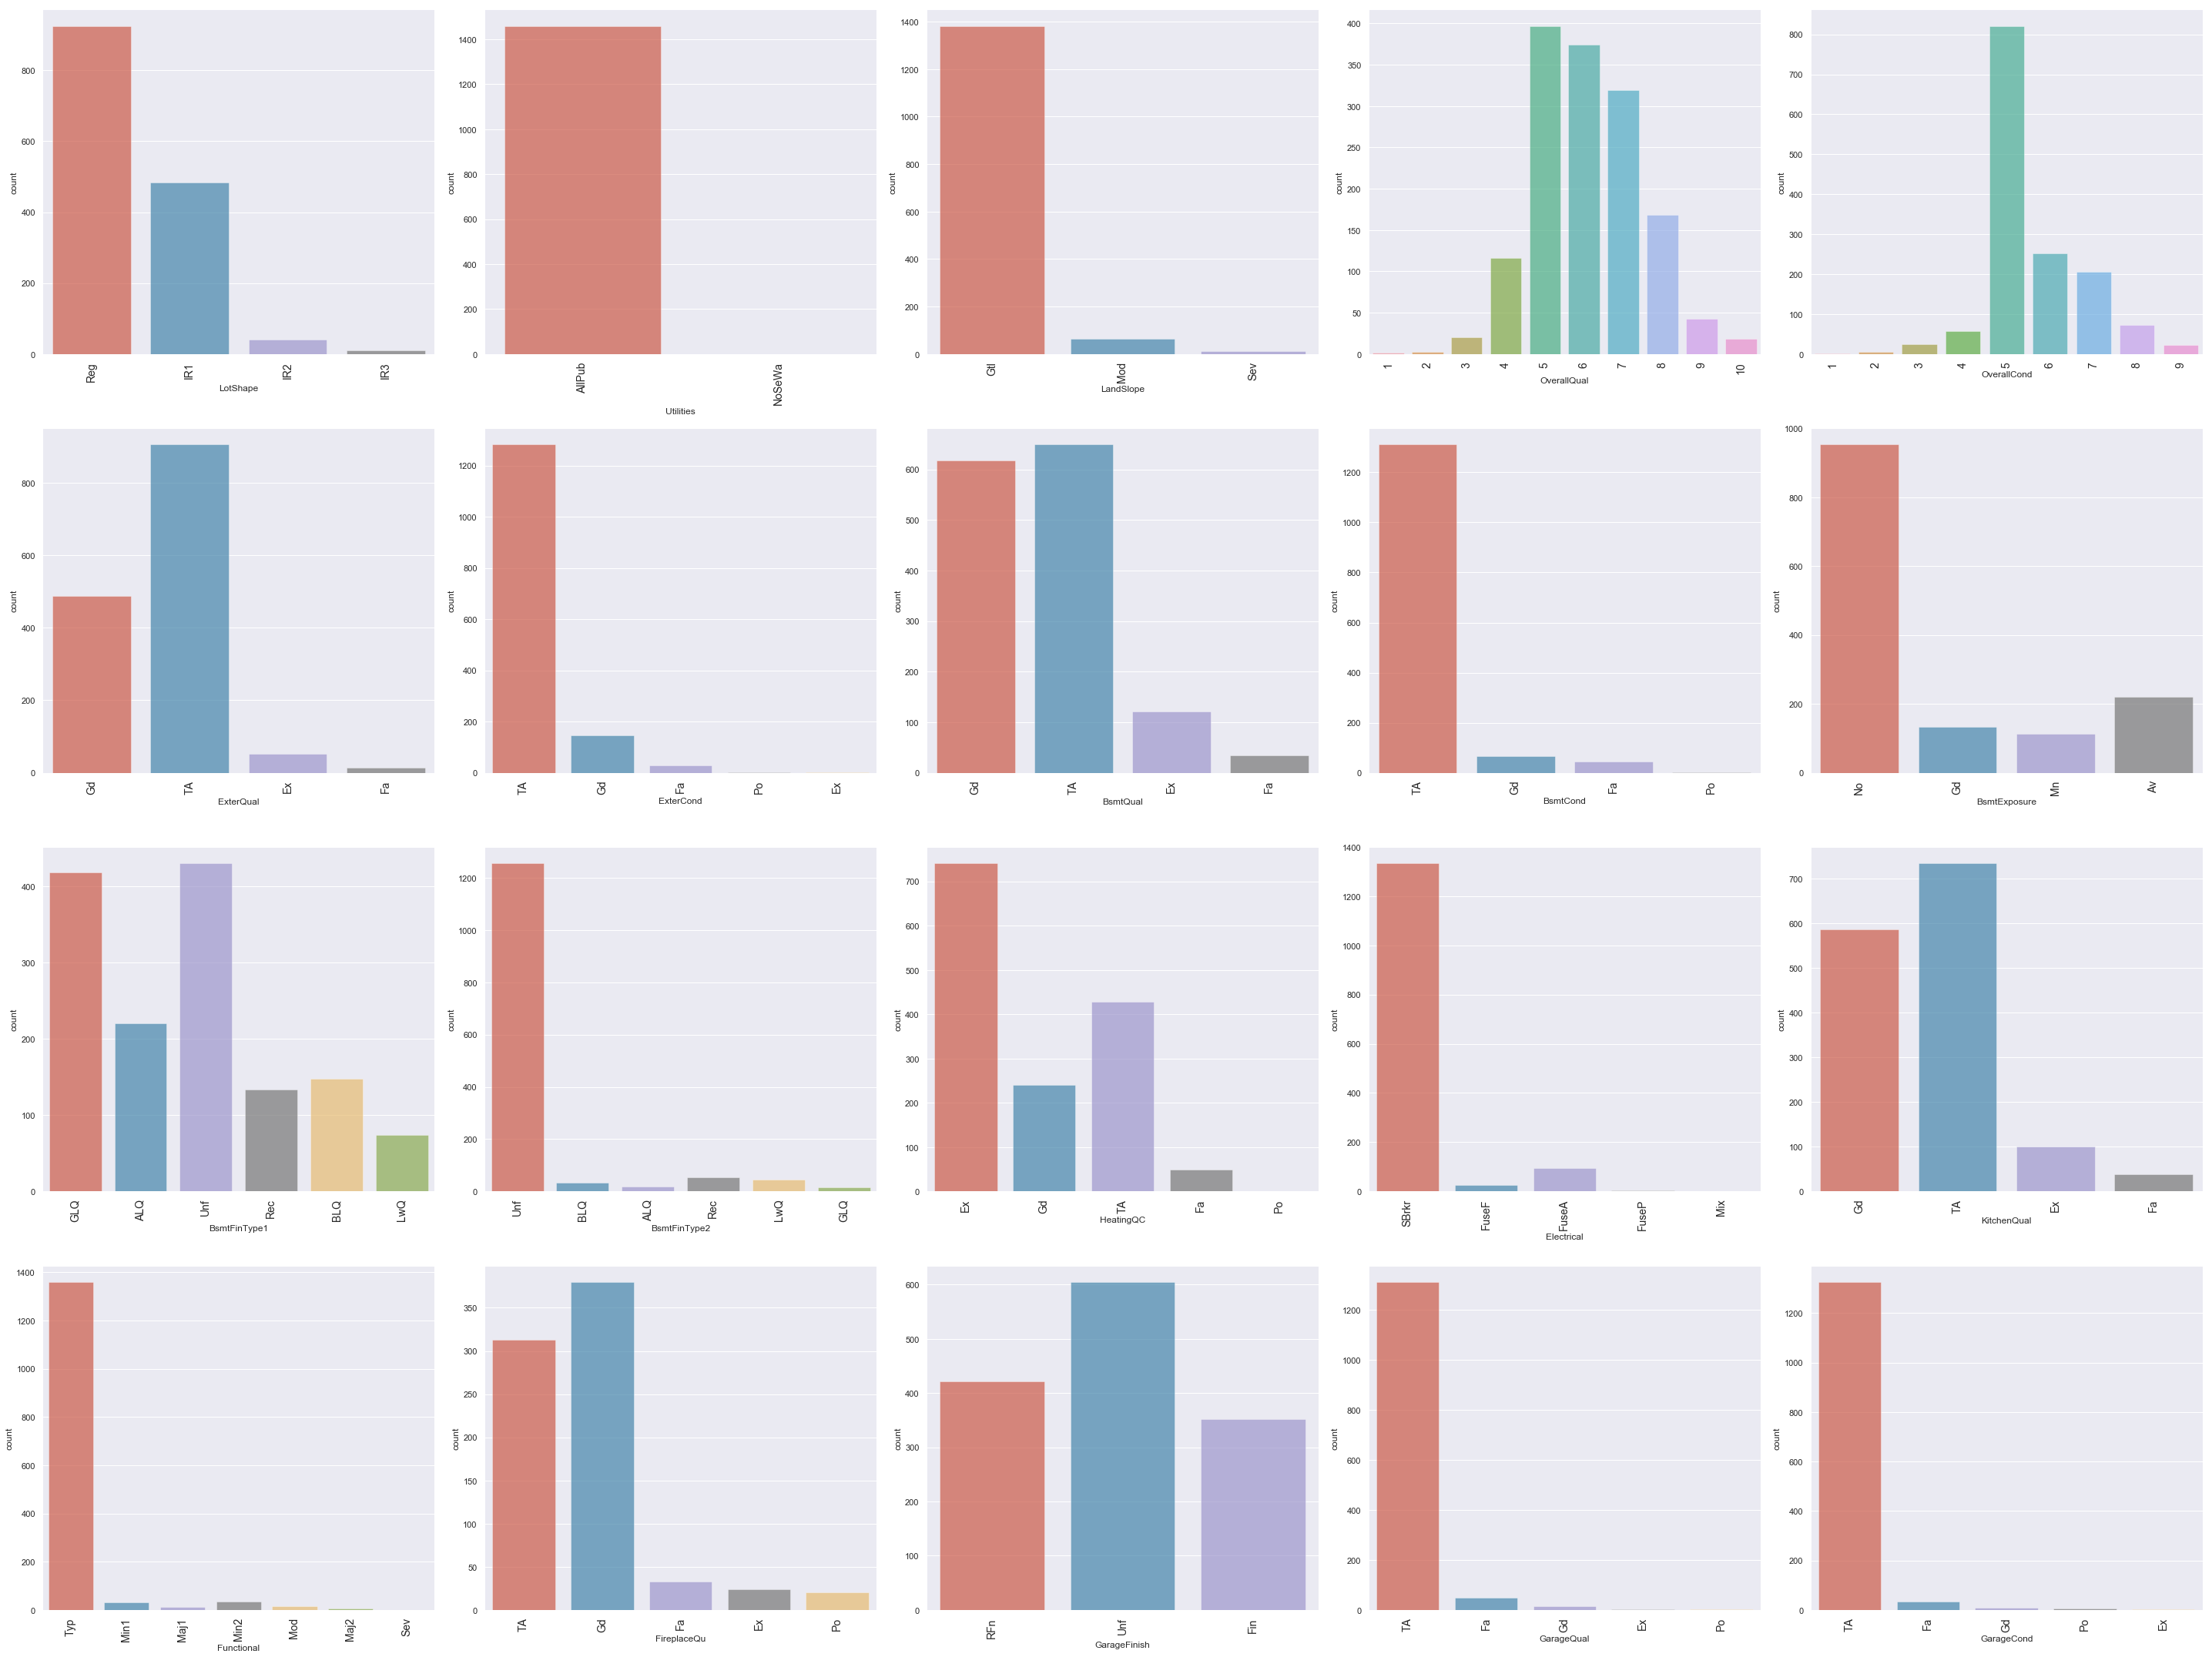

In [63]:
fig, axes = plt.subplots(round(len(train_df[ordinal].columns) / 6), 5, figsize=(40, 30))
for i, ax in enumerate(fig.axes):
    if i < len(train_df[ordinal].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=14)
        sns.countplot(x=train_df[ordinal].columns[i], alpha=0.7, data=train_df[ordinal], ax=ax)

fig.tight_layout()
fig.savefig('./images/ordinal_cnt.png', bbox_inches='tight')  

# save_fig("nominal_countplot") <- use this function if you want higher resolution
plt.show()

###### Discrete Variables

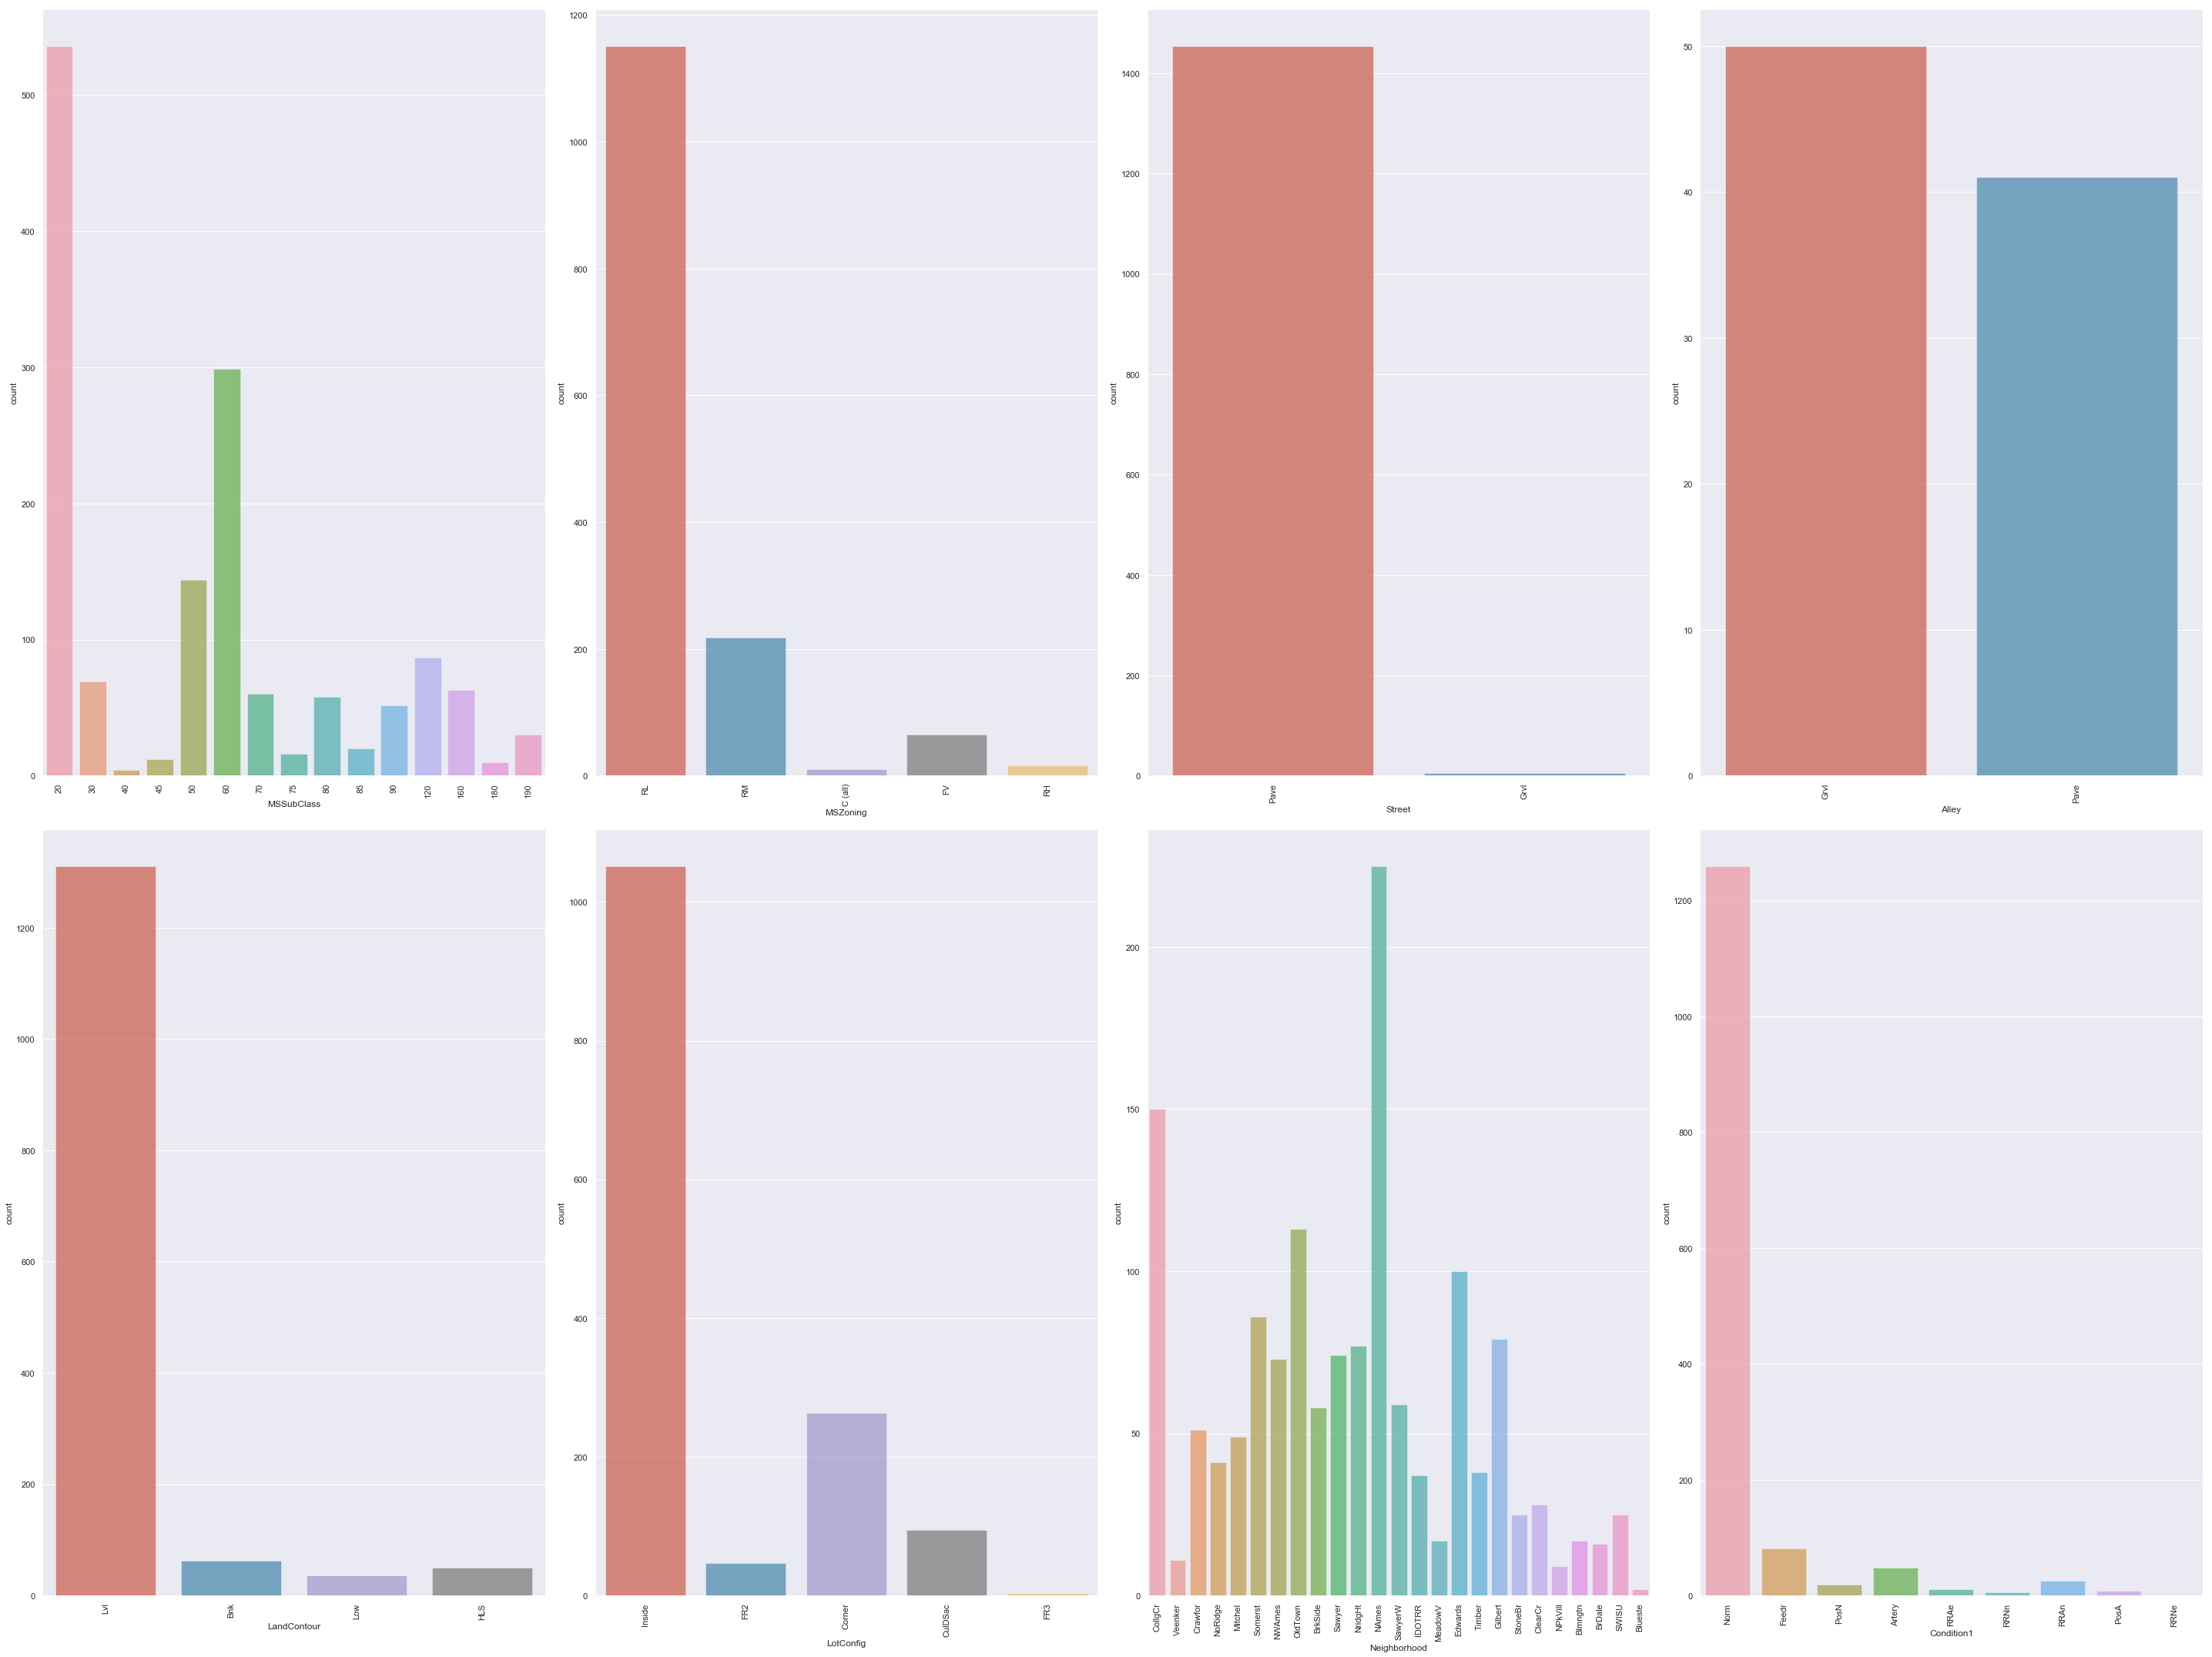

In [64]:
fig, axes = plt.subplots(round(len(train_df[discrete].columns) / 6), 4, figsize=(40, 30))
for i, ax in enumerate(fig.axes):
    if i < len(train_df[discrete].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=train_df[nominal].columns[i], alpha=0.7, data=train_df[nominal], ax=ax)

fig.tight_layout()


# save_fig("nominal_countplot") <- use this function if you want higher resolution
plt.show()

In [65]:
train_df[continuous].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
3SsnPorch        1460 non-null int64
ScreenPorch      1460 non-null int64
PoolArea         1460 non-null int64
MiscVal          1460 non-null int64
SalePrice        1460 non-null int64
dtypes: float64(2), int64(18)
memory usage: 228.2 KB


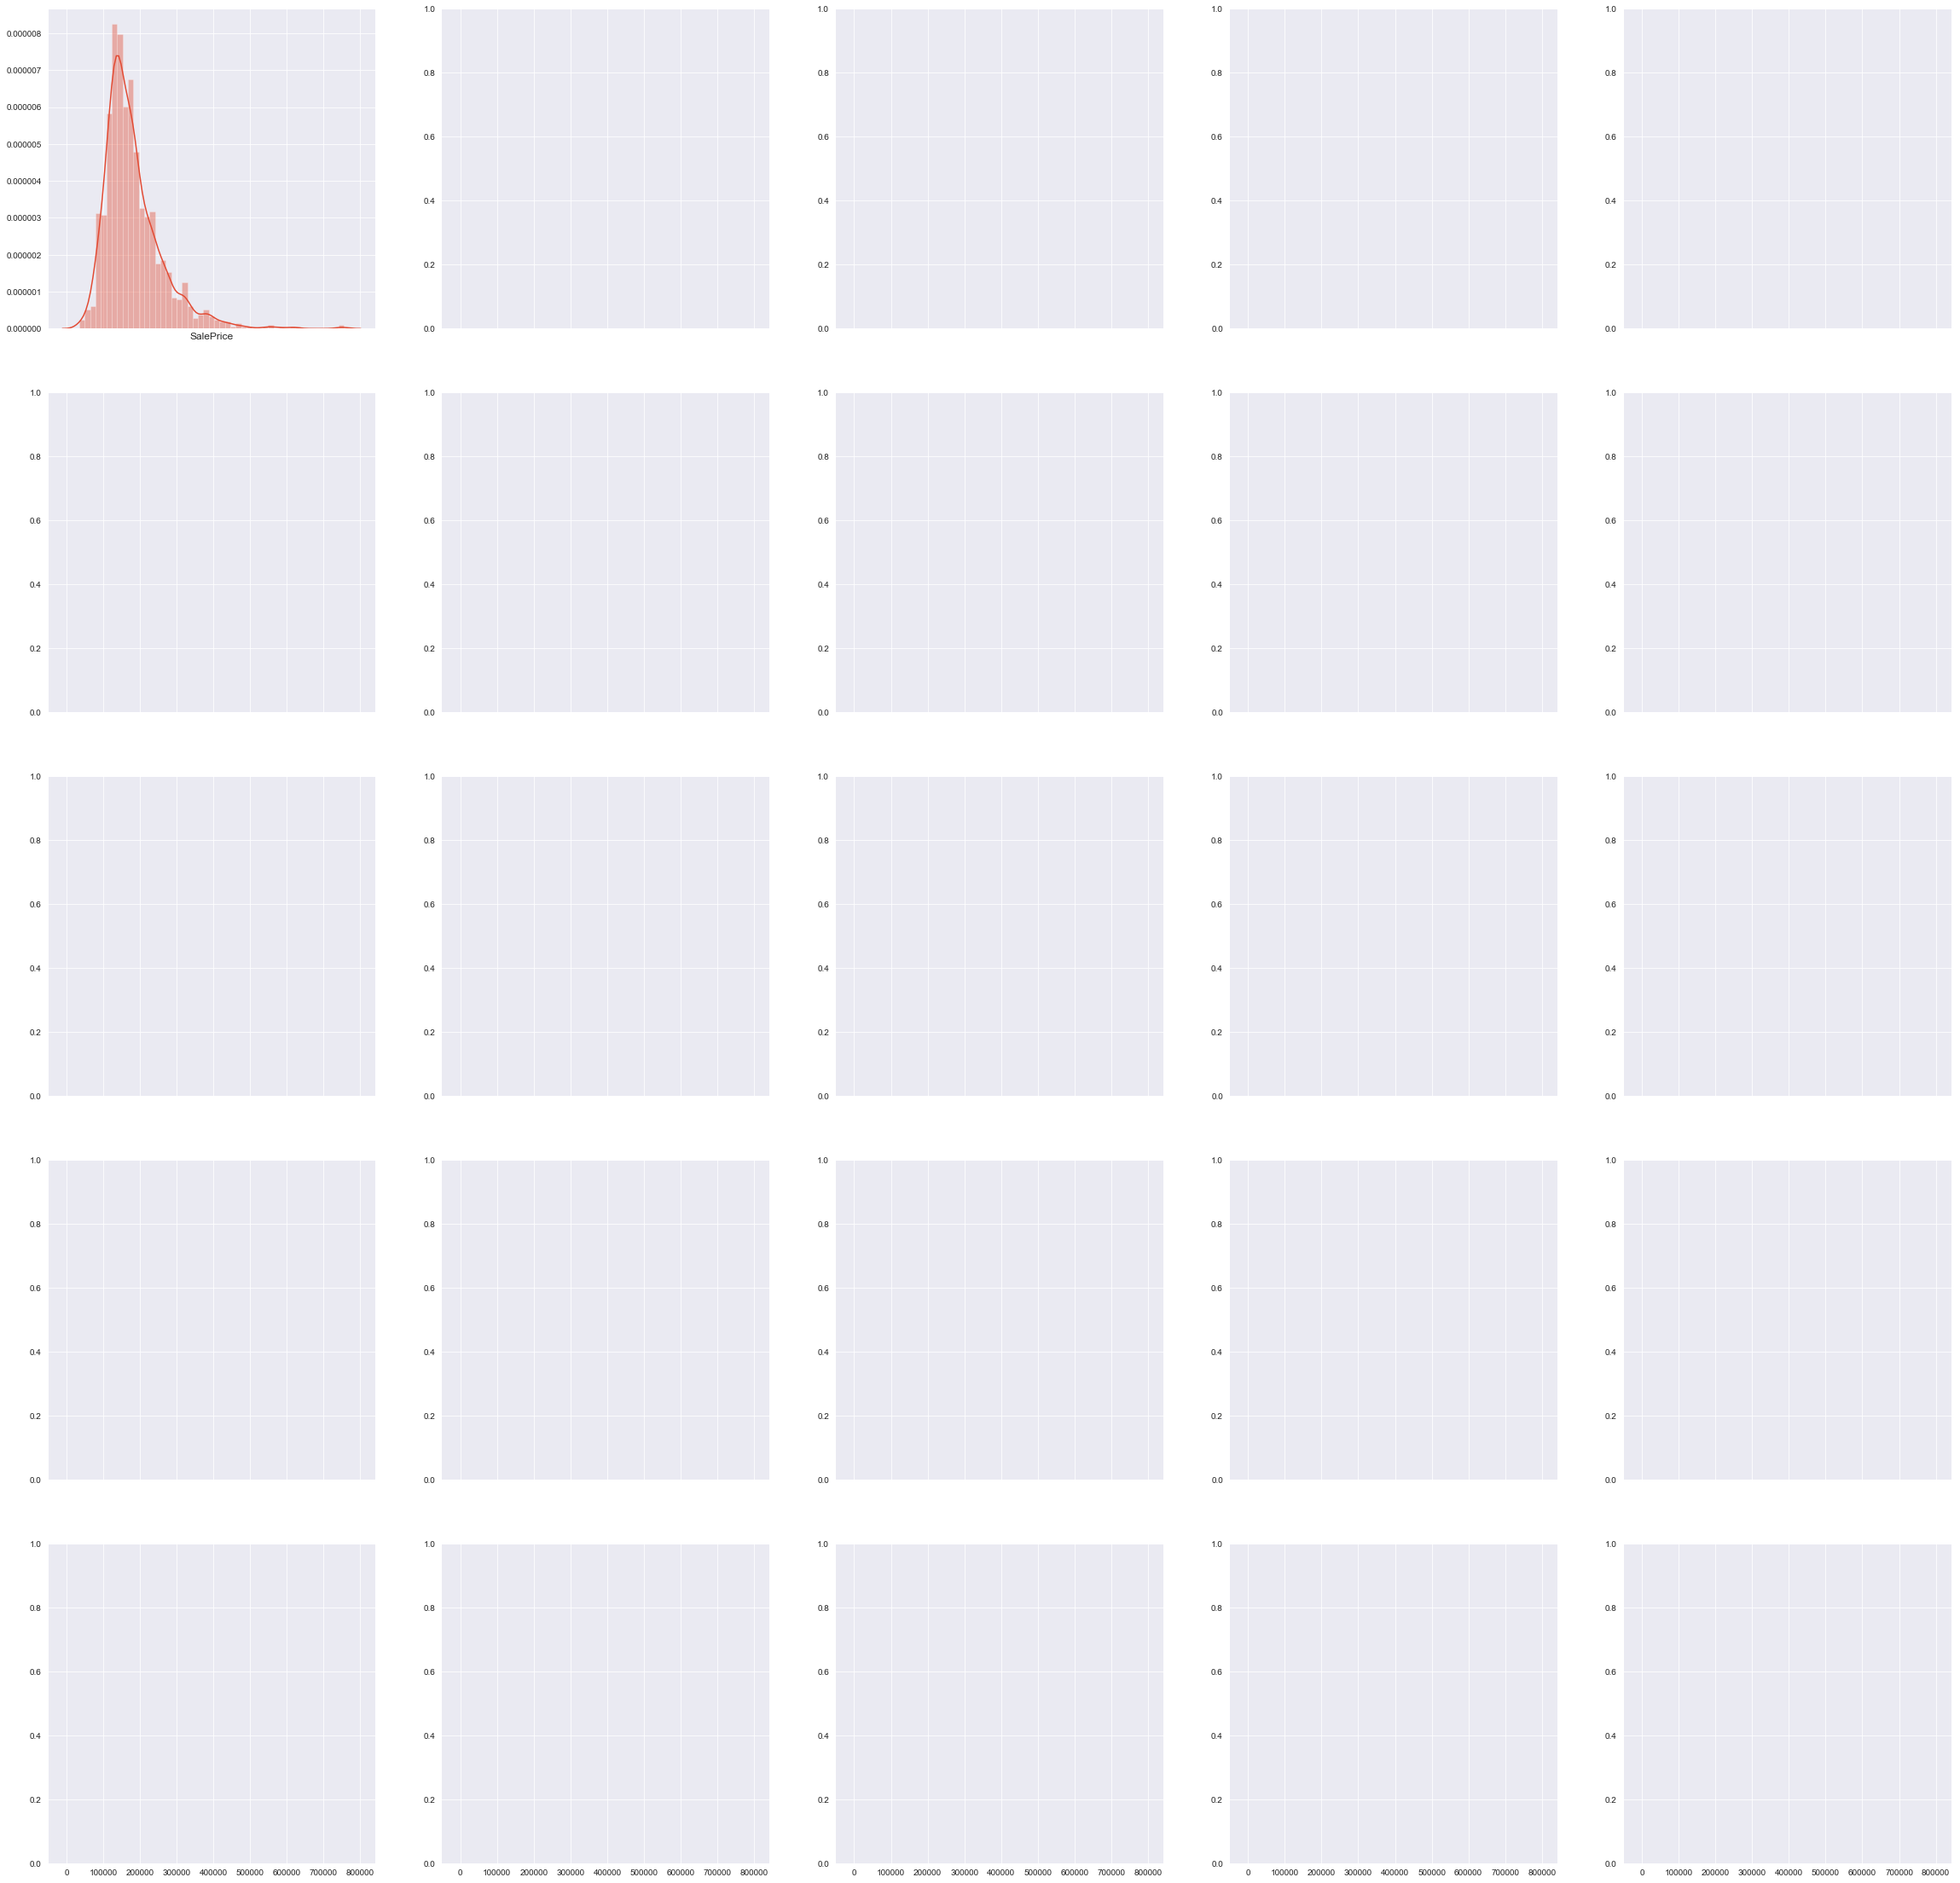

In [44]:
f, axes = plt.subplots(5,5, figsize=(40, 40), sharex=True)
sns.distplot(train_df["SalePrice"] ,  ax=axes[0, 0])


### 1.3 Analyze Target Variable

In [11]:
# get mu and sigma
mu, sigma = norm.fit(train_df['SalePrice'])
print( 'SalePrice(raw) \t\t : mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

SalePrice(raw) 		 : mu = 180921.20 and sigma = 79415.29


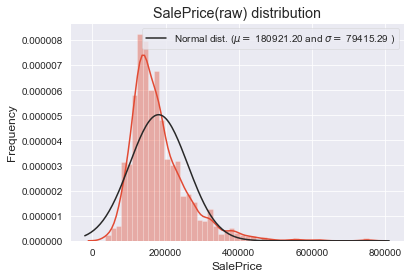

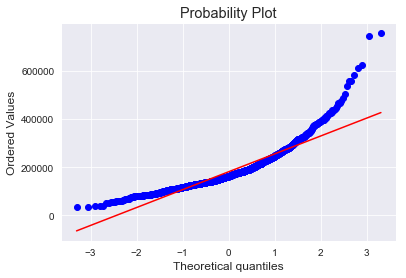

In [12]:
# Distribution Plot of Target Variable
sns.distplot(train_df['SalePrice'] , fit=norm);
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice(raw) distribution')

# Probability Plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()


>With this information we can see that the prices are **skewed right** and some outliers lies over 400,000. Lets apply a **log** on the independent variable (SalePrice) for machine learning.

In [14]:
# Making a dataframe containing both rawSalePrice and logSalePrice

raw_sp = train_df['SalePrice']
log_sp = train_df['SalePrice'].apply(np.log) # the logarithm with base e

SP = pd.concat([raw_sp, log_sp], axis=1, keys=['SalePrice', 'SalePrice(log)'])
SP.describe()

,SalePrice,SalePrice(log)
count,1460.000,1460.000
mean,180921.196,12.024
std,79442.503,0.399
min,34900.000,10.460
25%,129975.000,11.775
50%,163000.000,12.002
75%,214000.000,12.274
max,755000.000,13.534


In [15]:
mu2, sigma2 = norm.fit(SP['SalePrice(log)'])
print( 'SalePrice(log-normal) \t : mu = {:.2f} and sigma = {:.2f}'.format(mu2, sigma2))

SalePrice(log-normal) 	 : mu = 12.02 and sigma = 0.40


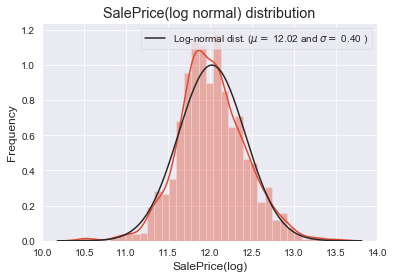

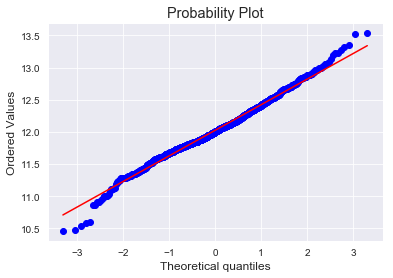

In [16]:
sns.distplot(SP['SalePrice(log)'] , fit=norm); # the logarithm with base e
#sns.distplot(np.log1p(SP['SalePrice']) , fit=norm);
plt.legend(['Log-normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu2, sigma2)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice(log normal) distribution')

fig = plt.figure()
res = stats.probplot(SP['SalePrice(log)'], plot=plt)
plt.show()

In [51]:
##  using (Square Feet) on the Train set

#all bathrooms 
train_df['Num_Bathrooms'] = train_df['FullBath'] + train_df['HalfBath'] + train_df['BsmtFullBath'] + train_df['BsmtHalfBath']
#total area of external structures 
train_df['ExtStructSF'] =  train_df['WoodDeckSF'] + train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch']

#total house area 
train_df['HouseSF'] = train_df['TotalBsmtSF'] + train_df['GrLivArea'] + train_df['GarageArea'] 

#### EDA PURPOSE----------------------------------------- uncomment to graph

In [19]:
# #mapping nominal rankings to numerical for different features:  

# mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
# train_df['ExterQual'] = train_df['ExterQual'].map(mp)
# train_df['ExterCond'] = train_df['ExterCond'].map(mp)
# train_df['HeatingQC'] = train_df['HeatingQC'].map(mp)
# train_df['KitchenQual'] = train_df['KitchenQual'].map(mp)

**The Kernel need to be restarted if above block is ran**

In [20]:
# for i, col in enumerate(float_col):
#     plt.figure(i)
#     sns.regplot(x=col, y='SalePrice', data=train_df)
#     plt.show()

----------------------------------------------------------------------------------

correlation(train_df) vs SalePrice

In [55]:
# correlation matrix against the Target Variable: using train_DF
corr_matrix = train_df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)


SalePrice        1.000
HouseSF          0.808
OverallQual      0.791
GrLivArea        0.709
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
Num_Bathrooms    0.613
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
GarageYrBlt      0.486
MasVnrArea       0.477
Fireplaces       0.467
ExtStructSF      0.391
BsmtFinSF1       0.386
LotFrontage      0.352
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
MSSubClass      -0.084
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64

In [23]:
rss.sort_values(ascending=False).head(10).index
train_df = train_df.drop(train_df.index[[691, 898, 1182, 803, 1169, 1046, 688, 769, 1181, 440]])
train_df=train_df[train_df['HouseSF']<8000]

## Getting Ready for 'Real' Feature Engineering

combine Train and Test for bigger dataset

In [24]:
# Combining Train and Test

# get row numbers for both
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
# store SalePrice
y_train = train_df.SalePrice.values
# concat train & test
all_data = pd.concat((train_df,test_df)).reset_index(drop=True) #make sure to reset index, because they will be overlapped
# drop target value on Features
all_data.drop(['SalePrice'], axis=1, inplace=True)  # axis=1 & inplace=True; to make it have impact

print("Size of all_data : {} rows and {} columns".format(all_data.shape[0], all_data.shape[1])) 

Size of all_data : 2907 rows and 82 columns


In [59]:
all_data.sample(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExtStructSF,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseSF,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,Num_Bathrooms,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
501,1214,0,0,NaN,2,1Fam,TA,No,698.000,96.000,ALQ,GLQ,1.000,0.000,TA,420.000,Y,Feedr,Norm,SBrkr,184,184.000,TA,TA,MetalSd,MetalSd,GdPrv,NaN,0,CBlock,1,Typ,461.000,2.000,Fa,Unf,Fa,Detchd,1965.000,1214,0,GasA,Ex,2889.000,1Story,1,TA,Lvl,Gtl,9170,Corner,70.000,Reg,0,20,RL,0.000,None,Shed,400,4,Edwards,2.000,0,7,5,Y,0,NaN,CompShg,Hip,Normal,WD,0,Pave,6,1214.000,AllPub,0,1965,1965,2007
533,820,527,0,NaN,3,2fmCon,TA,Gd,969.000,0.000,GLQ,Unf,1.000,0.000,Gd,148.000,Y,Norm,Norm,SBrkr,148,233.000,TA,TA,MetalSd,MetalSd,NaN,NaN,0,CBlock,1,Typ,0.000,0.000,NaN,NaN,NaN,NaN,nan,1347,0,GasA,TA,2464.000,2Story,1,TA,Lvl,Gtl,7000,Inside,70.000,Reg,0,190,RL,0.000,None,NaN,0,1,Edwards,2.000,0,7,5,N,0,NaN,CompShg,Gable,Normal,WD,0,Pave,5,1117.000,AllPub,85,1910,1991,2008
2820,1590,0,0,NaN,2,1Fam,TA,Gd,1122.000,0.000,GLQ,Unf,1.000,0.000,Ex,448.000,Y,Norm,Norm,SBrkr,0,nan,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,754.000,3.000,TA,Fin,TA,Attchd,2005.000,1590,1,GasA,Ex,nan,1Story,1,Ex,Lvl,Gtl,11645,Inside,78.000,Reg,0,20,RL,198.000,BrkFace,NaN,0,8,CollgCr,nan,80,5,8,Y,0,NaN,CompShg,Hip,Partial,New,0,Pave,6,1570.000,AllPub,176,2005,2006,2006
1586,1034,0,0,NaN,1,TwnhsE,TA,Gd,747.000,0.000,GLQ,Unf,1.000,0.000,Gd,235.000,Y,Norm,Norm,SBrkr,0,nan,TA,Gd,HdBoard,HdBoard,NaN,TA,1,CBlock,1,Typ,598.000,2.000,TA,Fin,TA,Attchd,1989.000,1034,0,GasA,Gd,nan,1Story,1,Gd,HLS,Mod,3907,Inside,35.000,IR1,0,120,RM,0.000,None,NaN,0,4,Blueste,nan,36,6,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,4,982.000,AllPub,141,1989,1989,2010
2243,691,862,0,NaN,3,1Fam,TA,No,414.000,0.000,Rec,Unf,0.000,0.000,Gd,277.000,Y,Norm,Norm,SBrkr,0,nan,TA,Gd,HdBoard,HdBoard,NaN,NaN,0,PConc,2,Typ,420.000,2.000,TA,Fin,TA,Attchd,1996.000,1553,1,GasA,Gd,nan,2Story,1,Gd,Lvl,Gtl,7875,Inside,63.000,Reg,0,60,RL,0.000,None,NaN,0,8,Gilbert,nan,44,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,691.000,AllPub,0,1996,1996,2007
2114,1242,742,0,Grvl,5,2fmCon,TA,Mn,196.000,0.000,Rec,Unf,0.000,0.000,TA,1046.000,Y,Norm,Norm,SBrkr,180,nan,TA,TA,Wd Sdng,Wd Sdng,MnPrv,NaN,0,PConc,2,Typ,360.000,1.000,NaN,NaN,NaN,Detchd,nan,1984,0,GasA,Gd,nan,2.5Unf,1,TA,Lvl,Gtl,8094,Inside,57.000,Reg,0,60,RM,0.000,None,Shed,1000,9,OldTown,nan,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,1242.000,AllPub,64,1910,1983,2008
1715,754,786,0,NaN,3,1Fam,TA,No,36.000,596.000,LwQ,GLQ,1.000,0.000,Gd,122.000,Y,RRAe,Norm,SBrkr,0,nan,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,495.000,2.000,TA,RFn,TA,Attchd,1994.000,1540,1,GasA,Ex,nan,2Story,1,Gd,Lvl,Gtl,9109,Inside,70.000,Reg,0,60,RL,0.000,None,NaN,0,10,SawyerW,nan,32,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,754.000,AllPub,140,1994,1994,2009
2324,1369,0,0,NaN,3,1Fam,TA,No,0.000,0.000,Unf,Unf,0.000,0.000,Gd,1369.000,Y,Feedr,Norm,SBrkr,0,nan,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,605.000,2.000,TA,Unf,TA,Attchd,2007.000,1369,0,GasA,Ex,nan,1Story,1,Gd,Lvl,Gtl,9910,Inside,75.000,Reg,0,20,RL,0.000,None,NaN,0,9,Somerst,nan,203,6,7,Y,0,NaN,CompShg,Gable,Partial,New,0,Pave,5,1369.000,AllPub,0,2007,2007,2007
935,1440,0,0,NaN,4,Duplex,TA,Gd,1440.000,0.000,GLQ,Unf,2.000,0.000,Gd,0.000,Y,Norm,Norm,SBrkr,0,321.000,TA,TA,MetalSd,MetalSd,NaN,NaN,0,PC

C:\Users\Young Min Cho\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


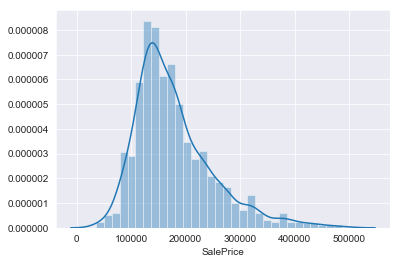

In [26]:
# Distribution Plot on Sales price: 
sns.distplot(train_df['SalePrice'])

In [29]:
### EXAMPLE of a PAIR PLOT

# sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(train_df[cols], size = 2.5)
# plt.show()

### Identifying Missing Values

In [25]:
#missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)  

,Total,Percent
PoolQC,2899,0.997
MiscFeature,2802,0.964
Alley,2709,0.932
Fence,2337,0.804
ExtStructSF,1459,0.502
Num_Bathrooms,1459,0.502
HouseSF,1459,0.502
FireplaceQu,1420,0.488
LotFrontage,486,0.167
GarageCond,159,0.055


In [61]:
missing_data[missing_data['Total'] > 22].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'ExtStructSF', 'Num_Bathrooms', 'HouseSF', 'FireplaceQu', 'LotFrontage', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea'], dtype='object')

**There is one row of missing data for Electrical**

In [62]:
all_data[all_data['Electrical'].isnull()] 

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExtStructSF,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseSF,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,Num_Bathrooms,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1367,754,640,0,NaN,3,1Fam,TA,No,0.000,0.000,Unf,Unf,0.000,0.000,Gd,384.000,Y,Norm,Norm,NaN,0,100.000,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.000,2.000,TA,Fin,TA,BuiltIn,2007.000,1394,1,GasA,Gd,2178.000,SLvl,1,Gd,Lvl,Gtl,9735,Inside,73.000,Reg,0,80,RL,0.000,None,NaN,0,5,Timber,3.000,0,5,5,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,7,384.000,AllPub,100,2006,2007,2008


#### Removing Missing Features

In [26]:
# drop total > 24
all_data = all_data.drop((missing_data[missing_data['Total'] > 24]).index,1)
# drop 1 row of electrical that has Null Value
all_data = all_data.drop(all_data.loc[all_data['Electrical'].isnull()].index)



In [27]:
# Dropping Features
all_data = all_data.drop("Utilities", axis=1)   # Skewed 100%
all_data = all_data.drop("BsmtUnfSF", axis=1)   # Skewed and Continuous
all_data = all_data.drop("MasVnrArea", axis=1)  # Skewed and Continuous
all_data = all_data.drop("MasVnrType", axis=1)  # Correlated to MasVnrArea
all_data = all_data.drop("Exterior2nd", axis=1) # Correlated to Exterior1st
all_data = all_data.drop("GarageCars", axis=1)  # Correlated to GarageArea Discrete
all_data = all_data.drop("SaleType", axis=1)    # Type of Sale depends on the buyer not the price 

### Imputation

In [28]:
# IMPUTATION BY MEDIUM

# continuous
all_data["BsmtFinSF1"].fillna(all_data["BsmtFinSF1"].median(), inplace=True) 
# continuous
all_data["BsmtFinSF2"].fillna(all_data["BsmtFinSF2"].median(), inplace=True) 
# continuous
all_data["GarageArea"].fillna(all_data["GarageArea"].median(), inplace=True) 
# continuous
all_data["TotalBsmtSF"].fillna(all_data["TotalBsmtSF"].median(), inplace=True) 

# IMPUTATION BY 0
# Both of these features have identical missing values. Also missing values on other Bsmt. Safely fill them with 0s
for col in ["BsmtFullBath",'BsmtHalfBath']:
    all_data[col].fillna(0, inplace = True)

# IMPUTATION BY MODE
all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0], inplace = True)
# Nominal
all_data["Neighborhood"].fillna(all_data["Neighborhood"].mode()[0], inplace=True) 
# Nominal
all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0], inplace=True) 
# Nominal
all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0], inplace = True)
# Nominal
all_data["Functional"].fillna(all_data["Functional"].mode()[0], inplace=True) 


In [66]:
all_data.RoofMatl.value_counts() 

CompShg    2865
Tar&Grv      23
WdShake       9
WdShngl       6
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

## Feature Engineering: 

In [29]:
all_data['HalfBath'].describe()
all_data['HalfBath'].value_counts() 

#all bathrooms 
all_data['Num_Bathrooms'] = all_data['FullBath'] + all_data['HalfBath'] + all_data['BsmtFullBath'] + all_data['BsmtHalfBath']

#total area of external structures 
all_data['ExtStructSF'] =  all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch']

#total house area 
all_data['HouseSF'] = all_data['TotalBsmtSF'] + all_data['GrLivArea']  + all_data['GarageArea']




In [30]:
# Create YearRemodAgg column to depcit better estimate between YearBuilt and YearRemodAdd
all_data['mean_year'] = all_data[['YearBuilt', 'YearRemodAdd']].mean(axis=1)
all_data['YearRemodAgg']=all_data[['YearBuilt', 'mean_year']].max(axis=1) 

In [32]:
# Drop 'mean_year','YearBuilt','YearRemodAdd': Since we have made a new YearRemodAgg Column
all_data.drop(['mean_year','YearBuilt','YearRemodAdd'],axis=1,inplace=True)

ValueError: labels ['mean_year' 'YearBuilt' 'YearRemodAdd'] not contained in axis

In [33]:
#mapping nominal rankings to numerical for different features:  
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
all_data['ExterQual'] = all_data['ExterQual'].map(mp)
all_data['ExterCond'] = all_data['ExterCond'].map(mp)
all_data['HeatingQC'] = all_data['HeatingQC'].map(mp)
all_data['KitchenQual'] = all_data['KitchenQual'].map(mp) 

In [41]:
# float_col = float_col.drop('Num_Bathrooms',axis=1)
# float_col = float_col.drop('HouseSF',axis=1)
# float_col = float_col.drop('ExStructSF',axis=1)

In [23]:
float_col = all_data.select_dtypes(['float64','int64'])


In [24]:
float_col.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fireplaces', 'FullBath', 'GarageArea', 'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'LotArea', 'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YrSold', 'Num_Bathrooms', 'ExtStructSF', 'HouseSF', 'YearRemodAgg'], dtype='object')

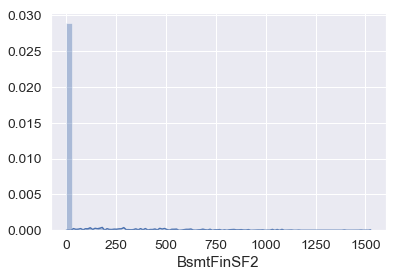

In [44]:
sns.distplot(all_data['BsmtFinSF2']);

In [45]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YrSold', 'Num_Bathrooms', 'ExtStructSF', 'HouseSF', 'YearRemodAgg'], dtype='object')

Make sure to work with Year Data

In [34]:
# Drop columns that are already in use / low correlation between Target Variable (SalePrice)

all_data.drop(['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath',
 'EnclosedPorch','ExterCond','FullBath','HalfBath','KitchenAbvGr','LotArea','LowQualFinSF','MiscVal','MoSold','OpenPorchSF',
'OverallCond','PoolArea','ScreenPorch','TotalBsmtSF','WoodDeckSF','YrSold','ExtStructSF'],axis=1,inplace=True) 

### Removing Low Corr. Categorical Variables

In [35]:
non_var_cols = ['LandSlope', 'Electrical', 'Functional', 'PavedDrive', 'Street', 'Condition1', 'Condition2', 'RoofMatl','LandContour', 'Heating', 'CentralAir']    
all_data.drop(non_var_cols, axis = 1, inplace = True) 


### Inspecting Remaining Nominal Categorical Variables 

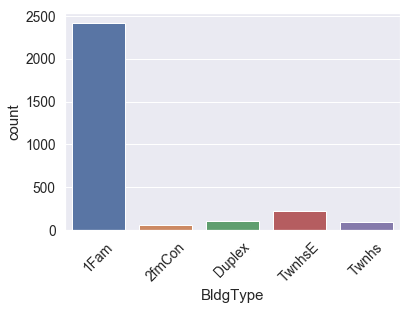

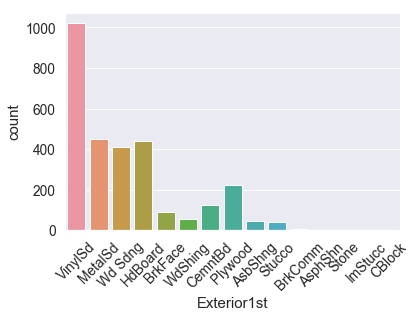

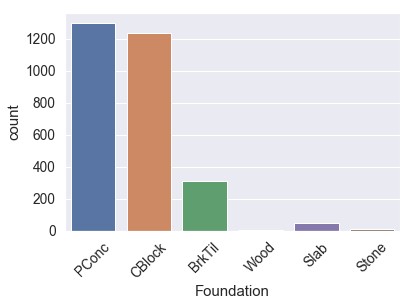

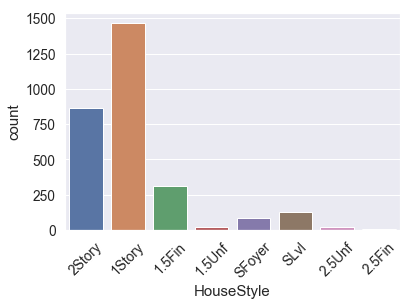

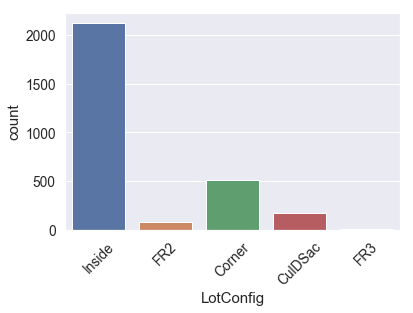

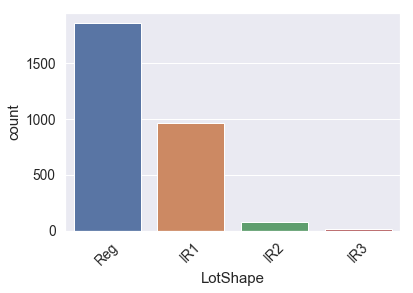

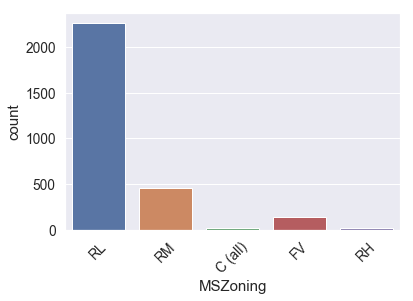

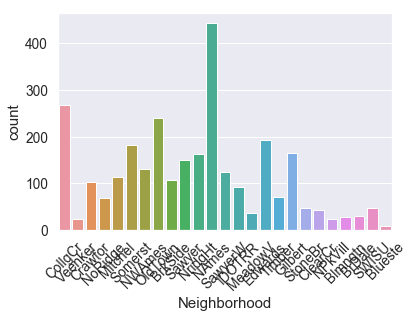

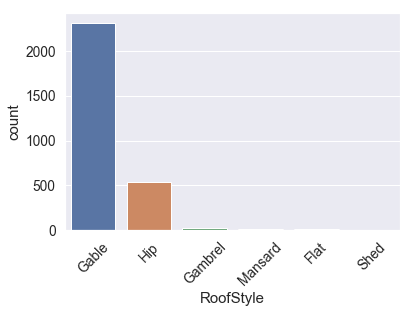

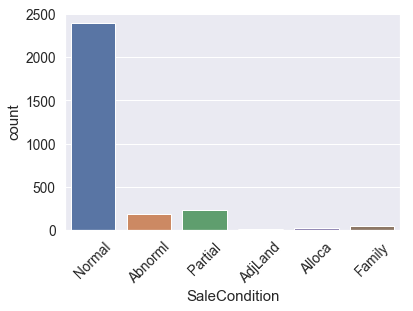

In [73]:
# sns.countplot on the Nominal Categorical Values to visualize
for i, col in enumerate(all_data.select_dtypes(['object']).columns):
    plt.figure(i)
    sns.countplot(x=col, data=all_data)
    plt.xticks(rotation=45)
    plt.show() 

In [ ]:
train_df.groupby('LandContour')['SalePrice'].mean()

In [ ]:
# There are outliers present in the training data
# GrLivArea: Above grade (ground) living area square feet
fig, ax = plt.subplots()
ax.scatter(x = train_df['LandContour'], y = train_df['SalePrice'], alpha = 0.6)
plt.ylabel('GarageArea', fontsize = 13)
plt.xlabel('GarageCars', fontsize = 13)
plt.show()

In [ ]:
#investigate mean sales price/neighborhood 

train_df.groupby('Neighborhood')['SalePrice'].agg('mean').plot('bar')

In [ ]:
#neighborhood sale price ranges boxplot 

f, ax = plt.subplots(figsize=(16, 12))
fig = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = train_df) 
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=45)
plt.show()

### Dropping Nominal Categorical Variables that may have misrepresentation

In [36]:
# all_data.select_dtypes(['object']).columns


all_data.drop(['BldgType','LotConfig','MSSubClass','MSZoning','RoofStyle','SaleCondition'],axis=1,inplace=True) 

### Sanity check to ensure correct number of features is dropped 

In [37]:

all_data.shape

(2906, 16)

### Sum of NA values in all_data dataframe (should be 0)

In [38]:

sum(all_data.isnull().sum()) 

0

### Write all_data to csv pre-dummification (for tree-based models) 

In [39]:
all_data.to_csv('data/all_data_no_dummies', index = False) 

### Save train_y to csv: 

In [40]:
y_train = pd.DataFrame(y_train) 

In [41]:
y_train.to_csv('data/y_train.csv', index = False)

## Dummify remaining nominal categorical variables 

In [42]:
all_data = pd.get_dummies(all_data) 

In [43]:
all_data.sample(10)

,ExterQual,Fireplaces,GarageArea,GrLivArea,HeatingQC,KitchenQual,OverallQual,TotRmsAbvGrd,Num_Bathrooms,HouseSF,YearRemodAgg,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
2502,2,0,747.000,1022,3,2,5,6,2.000,2791.000,1994.000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2666,3,1,885.000,1976,4,3,8,7,4.000,3905.000,1998.000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2787,2,0,0.000,819,4,3,5,4,1.000,1429.000,1934.500,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
877,3,0,440.000,2230,2,2,4,10,2.000,3465.000,1931.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
467,3,1,866.000,1634,4,3,8,7,2.000,4126.000,2006.000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2816,3,0,920.000,1440,3,3,6,8,4.000,3704.000,1993.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1414,3,2,525.000,2127,4,3,7,5,4.000,3875.000,1994.000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1880,2,0,195.000,1368,2,2,5,6,2.000,2641.000,1950.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2569,3,0,216.000,1001,4,3,5,5,1.000,2054.000,1968.500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
790,2,1,476.000,1564,2,2,6,7,3.000,2690.000,1980.500,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [44]:
#check dimensions of dummified df 

all_data.shape

(2906, 69)

## Write modified dataframe to CSV: 

In [45]:
all_data.to_csv('data/all_data.csv', index = False)  